# visualisation

In [507]:
import pandas as pd
import numpy as np
import fnmatch
import os
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib

from skimage import color
from skimage import io

In [192]:
def repl(string):
    string1 = string.replace(']','').replace('[', '').replace('\'','')
    return string1

def str_to_list(string):
    lst = list(string[1:-1].split(", "))
    lst1 = []
    for el in lst:
        lst1.append(el[1:-1])
    lst1 = list(set(lst1))


    lst2 =[]
    for el in lst1:
        lst2.append(space_to_underscore(el))
    
    return ' '.join(lst2)

def one_decimal(rating):
    return round(rating, 1)

def categorize_ratings(df, col):
    df[col] = df[col].apply(one_decimal)
    return df
def lower(text):
    return text.lower()

def lower_cols(df, cols):
    for col in cols:
        df[col] = df[col].apply(lower)
    return df

def remove_spaces(text):
    text = text.replace(' ', '', 10)
    return text

def space_to_underscore(text):
    text = text.replace(' ', '_',10)
    return text

def join_names(df, col):
    df[col] = df[col].apply(remove_spaces)
    return df

def read_books_info(filespath='../data/big_data_temp/'):
    pattern = 'gr_books_df_*.csv'
    print('Pattern :', pattern )

    files = os.listdir(filespath) 
    dfs_files = []
    for name in files: 
        if fnmatch.fnmatch(name, pattern):
            dfs_files.append(name)
    dfs_files
    dfs_paths = []
    for file in dfs_files:
        dfs_paths.append(filespath + file)

    revs_lst = []
    for file in dfs_paths:
        try:
            revs_lst.append(pd.read_csv(file))
        except:
            print(f'file {file} failed')
    print(len(revs_lst))
    df = pd.concat(revs_lst,axis=0)
    return df

In [199]:
def display_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names(),
                 np.asarray(tfidf_result.sum(axis=1)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
#     for item in sorted_scores:
#         print('{0:50} Score: {1}'.format(item[0], item[1]))
    return sorted_scores

In [401]:
import random

def transform_format(val):
    if val == 255:
        return 255
    else:
        return val

def grey_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

def brown_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 21.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

def green_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 80.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

def blue_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 130.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

def purple_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 160.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

def fuksi_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 220.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

def red_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 250.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

def yellow_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 40.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

# Dataframe load

In [193]:
books_df = read_books_info()
books_df['author_name'] = books_df['author_name'].apply(repl)
# books_df = categorize_ratings(books_df,'avg_rating')
books_df['genres'] = books_df['genres'].apply(str_to_list)
books_df = books_df[['isbn', 'book_title', 'avg_rating', 'author_name', 'book_desc', 'genres']]
books_df = lower_cols(books_df, ['book_title', 'author_name', 'book_desc', 'genres'])
books_df = join_names(books_df, 'author_name')
books_df.reset_index(inplace=True)

Pattern : gr_books_df_*.csv
6


In [195]:
# Tfidf
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 1), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(books_df['genres'])

# tf.stop_words_
# tf.vocabulary_
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tf.get_feature_names())
books_df = pd.concat([books_df, tfidf_df], axis=1)
features = tf.get_feature_names()

# KMeans clustering

In [447]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(tfidf_df)
labels = kmeans.labels_

In [448]:
tfidf_df['labels'] = labels

In [449]:
books_df['labels'] = labels

In [450]:
books_num = tfidf_df[['19th_century','labels']].groupby('labels').count()
books_num

,19th_century
labels,
0,54
1,67
2,53
3,46
4,79


In [431]:
books_df.head()

,index,isbn,book_title,avg_rating,author_name,book_desc,genres,19th_century,20th_century,21st_century,...,travel,trivia,true_crime,tv,unfinished,war,womens,world_history,writing,labels
0,0,1594488843,drive: the surprising truth about what motivat...,3.95,danielh.pink,the new york times bestseller that gives reade...,productivity psychology education science busi...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,2
1,1,033050889X,the mind's eye,3.91,oliversacks,"in musicophilia, oliver sacks explored music a...",audiobook psychology brain science medical hea...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.3277,0
2,2,0465090796,quirkology: how we discover the big truths in ...,3.84,richardwiseman,"for over twenty years, psychologist professor ...",audiobook psychology science sociology unfinis...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.474692,0.0,0.0,0.0,0.0000,2
3,3,0684868768,"emergence: the connected lives of ants, brains...",3.96,stevenjohnson,in the tradition of being digital and the tipp...,psychology science sociology business popular_...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,2
4,4,067976867X,consilience: the unity of knowledge,3.93,edwardo.wilson,one of our greatest living scientists--and the...,psychology history science environment popular...,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0000,3


In [451]:
def add_space(text):
    return text + " "

books_df['genres'] = books_df['genres'].apply(add_space)

In [452]:
text_df = books_df[['genres', 'labels']].groupby('labels').sum()

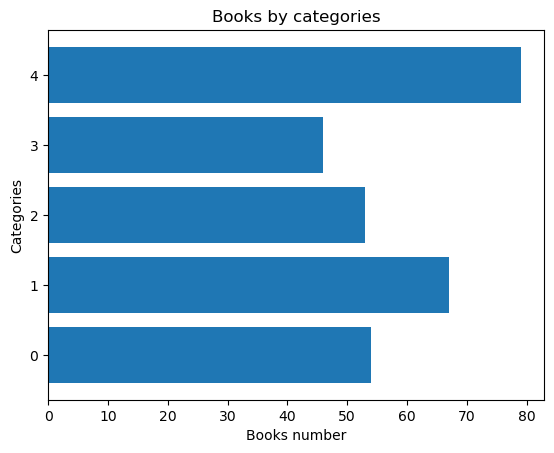

In [453]:
fig, ax = plt.subplots()
ax.barh(books_num.index, books_num['19th_century'], align='center')
ax.set_yticks(books_num.index)
# ax.set_yticklabels()
# ax.invert_yaxis()  # labels read top-to-bottom
ax.set_ylabel('Categories')
ax.set_xlabel('Books number')
ax.set_title('Books by categories')

plt.show()

In [ ]:
def check(string, word):
    if word in string:
        return True
    else:
        return False

# Word Cloud

In [490]:
all_genres = list(books_df[books_df['labels']==0]['genres'])
text = ''
for el in all_genres:
    text += " " + el
text = text.strip()
words_to_remove = [' audiobook ', ' science ', ' popular_science ', ' nonfiction ']
for word in words_to_remove:
    text = text.replace(word, ' ', 500)

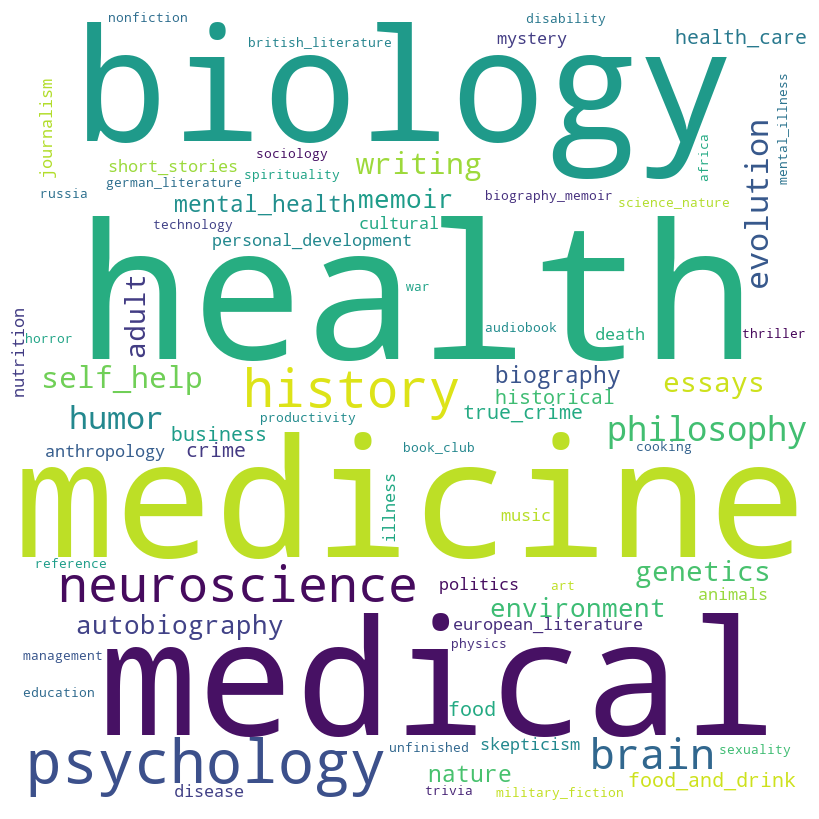

In [491]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', margin=2,
                      collocations=False,
                min_font_size = 10).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

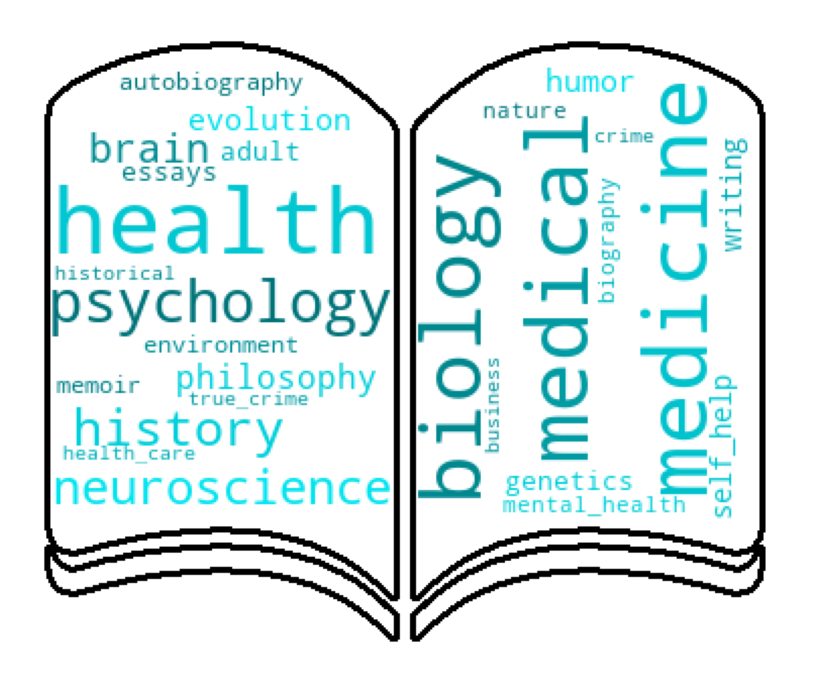

In [492]:
img = color.rgb2gray(io.imread('../img/book.jpg')) * 255

img1 = color.rgb2gray(io.imread('../img/a_book_slide.png')) * 255

img[img>10] = 255
img[img<=10] = 0

transformed_img1 = np.ndarray((img1.shape[0],img1.shape[1]), np.int32)

for i in range(len(img1)):
    transformed_img1[i] = list(map(transform_format, img1[i]))
    
wc = WordCloud(background_color="white", max_words=1000, 
               mask=transformed_img1,
               contour_width=3,  
               collocations=False, 
               min_font_size = 10,
               color_func=blue_color_func)

# Generate a wordcloud
wc.generate(text)

# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

wc.to_file("../img/word_cloud_book_0.png")


# Word counts by category

In [455]:
# Word count
wf = CountVectorizer(analyzer='word', ngram_range=(1, 1), min_df=0, stop_words='english')
wf_matrix = wf.fit_transform(books_df['genres'])

wf_df = pd.DataFrame(wf_matrix.toarray(), columns=wf.get_feature_names())
# word_counts_df = pd.concat([books, wf_df], axis=1)
wf_features = wf.get_feature_names()

In [504]:
len(wf_features)

183

In [456]:
wf_df['labels'] = labels

In [457]:
def display_scores_wc(word_nums, words):
    scores = zip(words, word_nums)
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
#     for item in sorted_scores:
#         print('{0:50} Score: {1}'.format(item[0], item[1]))
    return sorted_scores

def get_rid_of_words(text):
    words_to_remove = [' audiobook ', ' science ', ' popular_science ', ' nonfiction ']
    for word in words_to_remove:
        text = text.replace(word, ' ', 500)
    return text

In [458]:
scores = display_scores(wf, wf_matrix)

In [459]:
scores_dct = {}
for k, v in scores:
    scores_dct[k] = v

In [460]:
word_counts_by_label = wf_df.groupby(labels).sum()

In [418]:
word_counts_by_label

,19th_century,20th_century,21st_century,academic,adult,adventure,africa,american,animals,anthologies,...,travel,trivia,true_crime,tv,unfinished,war,womens,world_history,writing,labels
0,0,0,0,0,6,0,1,0,2,0,...,0,1,3,0,1,1,0,0,7,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,1,0,20
2,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,3,0,2,1,1,94
3,0,0,0,2,3,0,0,1,0,0,...,0,0,0,0,8,0,0,0,7,165
4,1,2,1,6,3,1,0,1,2,1,...,2,2,0,2,12,0,0,0,5,308
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,90
6,0,0,0,0,1,0,0,0,9,1,...,2,0,0,0,0,0,0,0,4,168


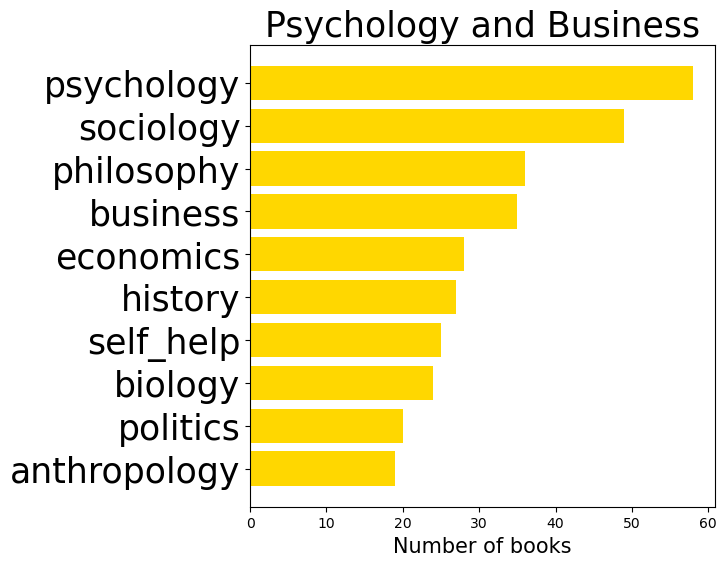

In [534]:
i=1

colors = ['c','gold']

categories = ['Health and Medicine', 'Psychology and Business', 'Space and Technology', 
              'Nature and Biology', 'History and Philosophy']

scores_wc = display_scores_wc(np.array(word_counts_by_label.loc[i]), wf_features)

words_to_remove = ['audiobook', 'science', 'popular_science', 'nonfiction', 'unfinished']
dct_wc = {}
for k,v in scores_wc:
    if k in words_to_remove:
        continue
    else: 
        dct_wc[k] = v
dct_wc.values()

plt.rcdefaults()
fig, ax = plt.subplots(figsize=[6,6])

# Example data
n=10

genres = list(dct_wc.keys())[:n]
y_pos = np.arange(len(genres))

ax.barh(y_pos, list(dct_wc.values())[:n],  align='center', color='gold')
ax.set_yticks(y_pos)
ax.set_yticklabels(genres, fontsize=25)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of books', fontsize=15)
ax.set_title(f'{categories[i]}', fontsize=25)
# plt.set_fontsize(20)

plt.savefig(f'../img/bar_cat_{i}.png')
plt.show()



#### 